In [1]:
pip install meteostat

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from meteostat import Point, Daily
from datetime import datetime
import pandas as pd

# 1. Başlangıç ve bitiş tarihini belirleyin
start = datetime(2023, 1, 1)  # Başlangıç tarihi
end = datetime(2023, 12, 31)  # Bitiş tarihi

# 2. Konumu tanımlayın (örnek: İstanbul, Türkiye)
location = Point(41.0082, 28.9784)  # Latitude (enlem) ve Longitude (boylam)

# 3. Günlük hava durumu verilerini çekin
data = Daily(location, start, end)
data = data.fetch()

# 4. Veriyi inceleyin
print(data)

# 5. CSV'ye kaydedin (opsiyonel)
data.to_csv("istanbul_2023_hava_durumu.csv")

            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  tsun
time                                                                     
2023-01-01   9.1   7.0  12.0   0.0   NaN  324.0   4.4   NaN  1032.1   NaN
2023-01-02   7.9   4.6  11.1   0.0   NaN  268.0   5.4   NaN  1031.6   NaN
2023-01-03   8.5   4.9  11.0   0.0   NaN  239.0  12.4   NaN  1027.8   NaN
2023-01-04   9.5   6.6  11.0   0.1   NaN  307.0  13.5   NaN  1026.8   NaN
2023-01-05  10.7   9.0  13.0   0.0   NaN  303.0  10.3   NaN  1022.4   NaN
...          ...   ...   ...   ...   ...    ...   ...   ...     ...   ...
2023-12-27  13.6  11.0  16.0   0.0   NaN  247.0  11.4   NaN  1022.1   NaN
2023-12-28  10.9   8.0  14.0   0.0   NaN  331.0   6.7   NaN  1027.5   NaN
2023-12-29   9.9   6.4  13.1   0.0   NaN  263.0   6.8   NaN  1022.7   NaN
2023-12-30  11.2   7.0  14.1   0.0   NaN  218.0   4.8   NaN  1020.7   NaN
2023-12-31  12.3  10.0  15.0   0.8   NaN  355.0   2.0   NaN  1020.6   NaN

[365 rows x 10 columns]


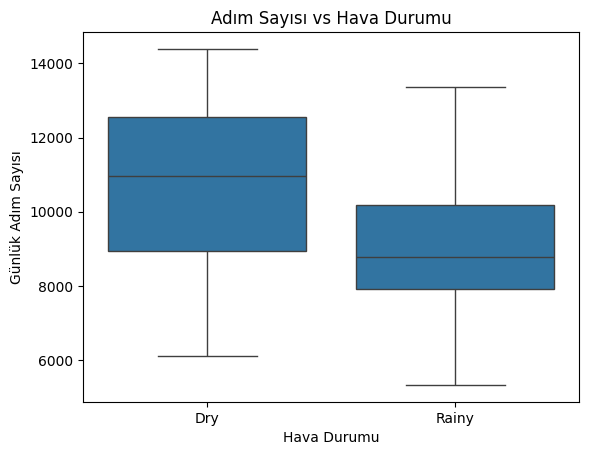

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


# Yağış verilerini kategorilere ayır
data['precip_category'] = data['prcp'].apply(lambda x: 'Rainy' if x > 0 else 'Dry')
data['steps'] = data['tavg'] * 300 + 5000  # Aynı adım sayısı verisi

# Boxplot
sns.boxplot(x='precip_category', y='steps', data=data)
plt.title('Adım Sayısı vs Hava Durumu')
plt.xlabel('Hava Durumu')
plt.ylabel('Günlük Adım Sayısı')
plt.show()
